# Importing Libaries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn import metrics
import itertools
from sklearn.feature_extraction.text import CountVectorizer

# Loading Data

In [2]:
#df=pd.read_csv('C:\\Users\\User\\dataset4-800.csv')
#df=pd.read_csv('C:\\Users\\User\\dataset3-500.csv')
#df=pd.read_csv('C:\\Users\\User\\dataset2-400.csv')
df=pd.read_csv('C:\\Users\\User\\dataset1-350.csv')
#df=pd.read_csv('C:\\Users\\User\\Kaggle400TEST.csv')
#df=pd.read_csv('C:\\Users\\User\\kaggle.csv')

In [3]:
df.head()

,sl no,headline,body,label
0,1,Concern over rapid rise in COVID-19 cases in S...,There is growing concern that South Africa's h...,1
1,2,NBA to Trump: Resign or We’ll Never Play Again...,The National Basketball Association recently s...,0
2,3,"COVID-19 No Vaccine Needed, There Is Already A...","Dr. Richard Bartlett, a Dallas MD who previous...",0
3,4,USA Presidential Candidate Joe Biden Tests Pos...,"Joe Biden, the Democratic presidential candida...",0
4,5,All Test Subjects of Bill Gates’ Vaccine Ended...,What could possibly go wrong with fast-trackin...,0


In [4]:
X=df.drop('label',axis=1)

In [5]:
X

,sl no,headline,body
0,1,Concern over rapid rise in COVID-19 cases in S...,There is growing concern that South Africa's h...
1,2,NBA to Trump: Resign or We’ll Never Play Again...,The National Basketball Association recently s...
2,3,"COVID-19 No Vaccine Needed, There Is Already A...","Dr. Richard Bartlett, a Dallas MD who previous..."
3,4,USA Presidential Candidate Joe Biden Tests Pos...,"Joe Biden, the Democratic presidential candida..."
4,5,All Test Subjects of Bill Gates’ Vaccine Ended...,What could possibly go wrong with fast-trackin...
...,...,...,...
345,346,"Ethiopia’s COVID-19 cases surpass 27,000",Ethiopia’s confirmed COVID-19 cases reached 27...
346,347,Hair Weave and Lace Front Made In China May Co...,It may be time to show us what your scalp and ...
347,348,"Governor of Venezuela's capital district, key ...","Dario Vivas, the governor of Venezuela's capit..."
348,349,Russia Did Exposes COVID-19 With Scientific Da...,Russia has just released very important data w...


In [6]:
X.head()

,sl no,headline,body
0,1,Concern over rapid rise in COVID-19 cases in S...,There is growing concern that South Africa's h...
1,2,NBA to Trump: Resign or We’ll Never Play Again...,The National Basketball Association recently s...
2,3,"COVID-19 No Vaccine Needed, There Is Already A...","Dr. Richard Bartlett, a Dallas MD who previous..."
3,4,USA Presidential Candidate Joe Biden Tests Pos...,"Joe Biden, the Democratic presidential candida..."
4,5,All Test Subjects of Bill Gates’ Vaccine Ended...,What could possibly go wrong with fast-trackin...


In [7]:
y=df['label']

In [8]:
X.shape

(350, 3)

In [9]:
y.head

<bound method NDFrame.head of 0      1
1      0
2      0
3      0
4      0
      ..
345    1
346    0
347    1
348    0
349    0
Name: label, Length: 350, dtype: int64>

In [10]:
df.shape

(350, 4)

In [11]:
df = df.dropna()

In [12]:
df.shape

(349, 4)

In [13]:
df

,sl no,headline,body,label
0,1,Concern over rapid rise in COVID-19 cases in S...,There is growing concern that South Africa's h...,1
1,2,NBA to Trump: Resign or We’ll Never Play Again...,The National Basketball Association recently s...,0
2,3,"COVID-19 No Vaccine Needed, There Is Already A...","Dr. Richard Bartlett, a Dallas MD who previous...",0
3,4,USA Presidential Candidate Joe Biden Tests Pos...,"Joe Biden, the Democratic presidential candida...",0
4,5,All Test Subjects of Bill Gates’ Vaccine Ended...,What could possibly go wrong with fast-trackin...,0
...,...,...,...,...
345,346,"Ethiopia’s COVID-19 cases surpass 27,000",Ethiopia’s confirmed COVID-19 cases reached 27...,1
346,347,Hair Weave and Lace Front Made In China May Co...,It may be time to show us what your scalp and ...,0
347,348,"Governor of Venezuela's capital district, key ...","Dario Vivas, the governor of Venezuela's capit...",1
348,349,Russia Did Exposes COVID-19 With Scientific Da...,Russia has just released very important data w...,0


In [14]:
messages=df.copy()

In [15]:
messages.reset_index(inplace=True)

In [16]:
messages.head(40)

,index,sl no,headline,body,label
0,0,1,Concern over rapid rise in COVID-19 cases in S...,There is growing concern that South Africa's h...,1
1,1,2,NBA to Trump: Resign or We’ll Never Play Again...,The National Basketball Association recently s...,0
2,2,3,"COVID-19 No Vaccine Needed, There Is Already A...","Dr. Richard Bartlett, a Dallas MD who previous...",0
3,3,4,USA Presidential Candidate Joe Biden Tests Pos...,"Joe Biden, the Democratic presidential candida...",0
4,4,5,All Test Subjects of Bill Gates’ Vaccine Ended...,What could possibly go wrong with fast-trackin...,0
5,5,6,Cameroon: When Covid-19 Sways Cash-Strapped Ca...,Prior to the onset of the coronavirus pandemic...,1
6,6,7,"BREAKING: Coronavirus Hits 15% Fatality Rate, ...",BREAKING: The U.S. news media is currently run...,0
7,7,8,Coronavirus in Scotland: Peterhead primary clo...,NHS Grampian said it was working to identify c...,1
8,8,9,"Indonesia deploys 83,566 police, army personne...","Indonesia has deployed 83,566 police and army ...",1
9,9,10,New Evidence Shows Wearing Face Mask Can Help ...,"Dr. Russell Blaylock, a retired U.S. neurosurg...",0


In [17]:
y=messages['label']

# Joining the headline and body

In [18]:
messages = messages.headline+str(' ')+messages.body
#messages = messages.title+str(' ')+messages.text
messages.head(40)

0     Concern over rapid rise in COVID-19 cases in S...
1     NBA to Trump: Resign or We’ll Never Play Again...
2     COVID-19 No Vaccine Needed, There Is Already A...
3     USA Presidential Candidate Joe Biden Tests Pos...
4     All Test Subjects of Bill Gates’ Vaccine Ended...
5     Cameroon: When Covid-19 Sways Cash-Strapped Ca...
6     BREAKING: Coronavirus Hits 15% Fatality Rate, ...
7     Coronavirus in Scotland: Peterhead primary clo...
8     Indonesia deploys 83,566 police, army personne...
9     New Evidence Shows Wearing Face Mask Can Help ...
10    Good News: Coronavirus Destroyed By Chlorine D...
11    Hydroxychloroquine is why Uganda, with a popul...
12    BILL GATES: THE CATHOLIC RELIGION MAY HAVE TO ...
13    Italian Parliamentarian Calls For The Arrest o...
14    This is Fraud: 10% of Reported COVID-19 Deaths...
15    Pope Francis Tests Positive For Coronavirus, V...
16    U.K. hospitals struggle as new coronavirus var...
17    Covid19: When will Britons be allowed to v

In [19]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [20]:
messages.head(40)

0     Concern over rapid rise in COVID-19 cases in S...
1     NBA to Trump: Resign or We’ll Never Play Again...
2     COVID-19 No Vaccine Needed, There Is Already A...
3     USA Presidential Candidate Joe Biden Tests Pos...
4     All Test Subjects of Bill Gates’ Vaccine Ended...
5     Cameroon: When Covid-19 Sways Cash-Strapped Ca...
6     BREAKING: Coronavirus Hits 15% Fatality Rate, ...
7     Coronavirus in Scotland: Peterhead primary clo...
8     Indonesia deploys 83,566 police, army personne...
9     New Evidence Shows Wearing Face Mask Can Help ...
10    Good News: Coronavirus Destroyed By Chlorine D...
11    Hydroxychloroquine is why Uganda, with a popul...
12    BILL GATES: THE CATHOLIC RELIGION MAY HAVE TO ...
13    Italian Parliamentarian Calls For The Arrest o...
14    This is Fraud: 10% of Reported COVID-19 Deaths...
15    Pope Francis Tests Positive For Coronavirus, V...
16    U.K. hospitals struggle as new coronavirus var...
17    Covid19: When will Britons be allowed to v

# Data Pre Processing

In [21]:
import nltk

nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re
ps = PorterStemmer()
corpus = []
for i in range(0, len(messages)):
    review = re.sub('[^a-zA-Z]', ' ', messages[i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [22]:
corpus[1]

'nba trump resign never play usa news nation basketbal associ recent suspend season time reason given seem justifi given emerg covid sever player leagu test posit howev confirm anonym sourc leagu shutdown make month simpli look good excus shut player led washington gener star power forward art tubol held secret vote prior begin season suspend leagu credibl reason presid donald trump resign offic vote sinc much leagu made hollywood actor musician wannab millionair crybabi overwhelm vote approv measur tubol said leagu popular leagu world lot team swing state know cannot directli pressur presid resign hold approv rate hostag make peopl scream remov worst case get novemb plan rest season get way schedul set begin januari come liber elit relentlessli attack countri presid first lebron jame threaten sit unless nation anthem longer play game even nhl major leagu basebal join futil effort need stand firm show overgrown millionair toddler need us need novemb'

# Applying TFidf Vectorizer

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_v=TfidfVectorizer(max_features=5000,ngram_range=(1,3))
X=tfidf_v.fit_transform(corpus).toarray()

In [24]:
X.shape

(349, 5000)

# Divide the dataset into Train and Test

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0, shuffle=True)

In [26]:
tfidf_v.get_feature_names()[:20]

['abbott',
 'abil',
 'abl',
 'abort',
 'abroad',
 'absolut',
 'abstract',
 'abus',
 'academ',
 'academi',
 'acceler',
 'accept',
 'access',
 'accident',
 'accommod',
 'accompani',
 'accord',
 'accord cdc',
 'accord data',
 'accord govern']

In [27]:
tfidf_v.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.float64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'norm': 'l2',
 'preprocessor': None,
 'smooth_idf': True,
 'stop_words': None,
 'strip_accents': None,
 'sublinear_tf': False,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'use_idf': True,
 'vocabulary': None}

In [28]:
count_df = pd.DataFrame(X_train, columns=tfidf_v.get_feature_names())

In [29]:
count_df.head()

,abbott,abil,abl,abort,abroad,absolut,abstract,abus,academ,academi,...,youngster,youth,youth day,youtub,zambia,zambian,zealand,zero,zinc,zucker
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Confusion matrix

In [30]:
import matplotlib.pyplot as plt

In [31]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Greens):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# MultinomialNB Algorithm

In [32]:
from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB()

accuracy:   0.888
Confusion matrix, without normalization


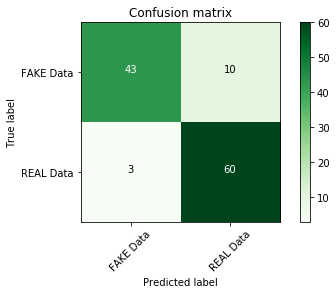

In [33]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE Data', 'REAL Data'])

In [34]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.93      0.81      0.87        53
           1       0.86      0.95      0.90        63

    accuracy                           0.89       116
   macro avg       0.90      0.88      0.89       116
weighted avg       0.89      0.89      0.89       116



# Passive Aggressive Classifier Algorithm

In [35]:
from sklearn.linear_model import PassiveAggressiveClassifier
linear_clf = PassiveAggressiveClassifier(max_iter=50)

accuracy:   0.888
Confusion matrix, without normalization


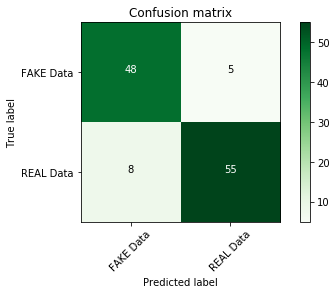

In [36]:
linear_clf.fit(X_train, y_train)
pred = linear_clf.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
PAC = score
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE Data', 'REAL Data'])

In [37]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.86      0.91      0.88        53
           1       0.92      0.87      0.89        63

    accuracy                           0.89       116
   macro avg       0.89      0.89      0.89       116
weighted avg       0.89      0.89      0.89       116



# Logistic Regression

accuracy:   0.862
Confusion matrix, without normalization


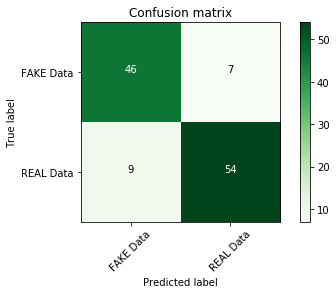

In [38]:
from sklearn.linear_model import LogisticRegressionCV

lr = LogisticRegressionCV(solver = 'liblinear', ).fit(X_train, y_train)

pred = lr.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
LR = score
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE Data', 'REAL Data'])


In [39]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.84      0.87      0.85        53
           1       0.89      0.86      0.87        63

    accuracy                           0.86       116
   macro avg       0.86      0.86      0.86       116
weighted avg       0.86      0.86      0.86       116



# SVM Classifier

accuracy:   0.862
Confusion matrix, without normalization


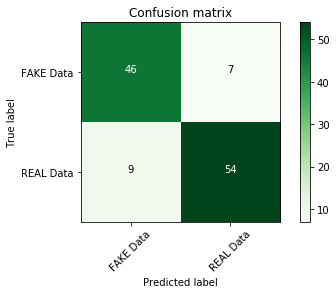

In [40]:
from sklearn import svm
linear_svm=svm.SVC(kernel='linear')
linear_svm.fit(X_train,y_train)
pred = linear_svm.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
SVM = score
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE Data', 'REAL Data'])

In [41]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.84      0.87      0.85        53
           1       0.89      0.86      0.87        63

    accuracy                           0.86       116
   macro avg       0.86      0.86      0.86       116
weighted avg       0.86      0.86      0.86       116

